##**Solar Energy Generation (Regression)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/spg.csv')
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,NaN,31.0,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,NaN,NaN,1035.1,0.0,0.0,0.0,0,0,0,NaN,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33.0,NaN,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,NaN,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27.0,1034.4,0.0,0.0,0.0,0,0,0,NaN,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [ ]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4138.000000,4155.000000,4180.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4171.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.153183,51.346570,1019.269904,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,388.811362,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.877816,23.517758,6.951055,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.934981,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.445000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.625000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.830000,48.000000,1018.000000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,382.700000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.420000,70.000000,1023.500000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,600.750000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4138 non-null   float64
 1   relative_humidity_2_m_above_gnd    4155 non-null   float64
 2   mean_sea_level_pressure_MSL        4180 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4171 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

##**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
temperature_2_m_above_gnd,75
relative_humidity_2_m_above_gnd,58
mean_sea_level_pressure_MSL,33
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,42


In [ ]:
df.shape

(4213, 21)

In [ ]:
missing_values = df.isnull().sum()

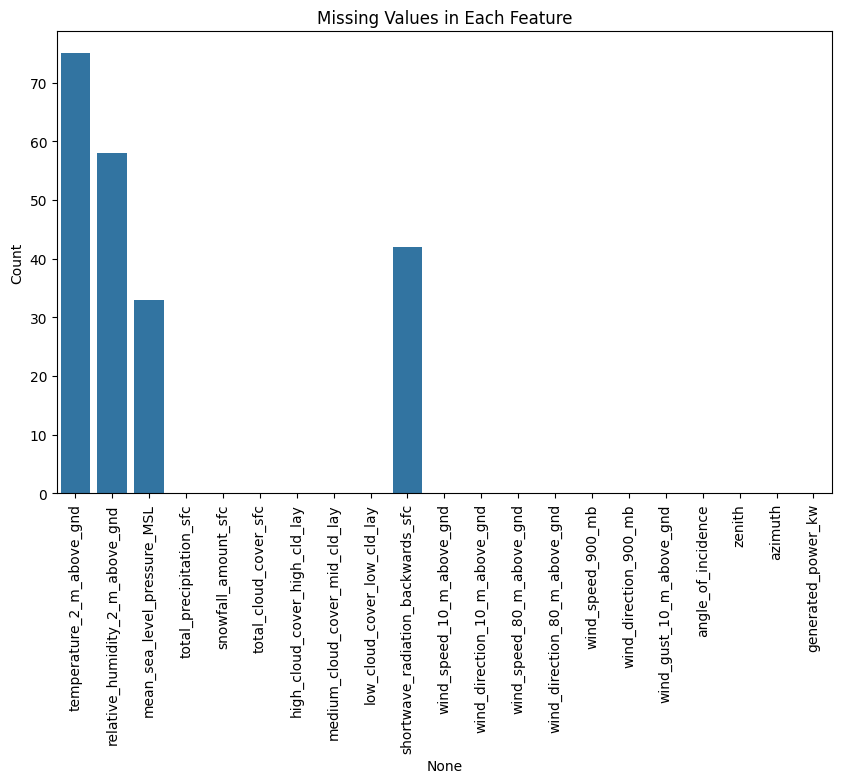

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Each Feature")
plt.ylabel("Count")
plt.show()

In [ ]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace = True)

In [ ]:
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


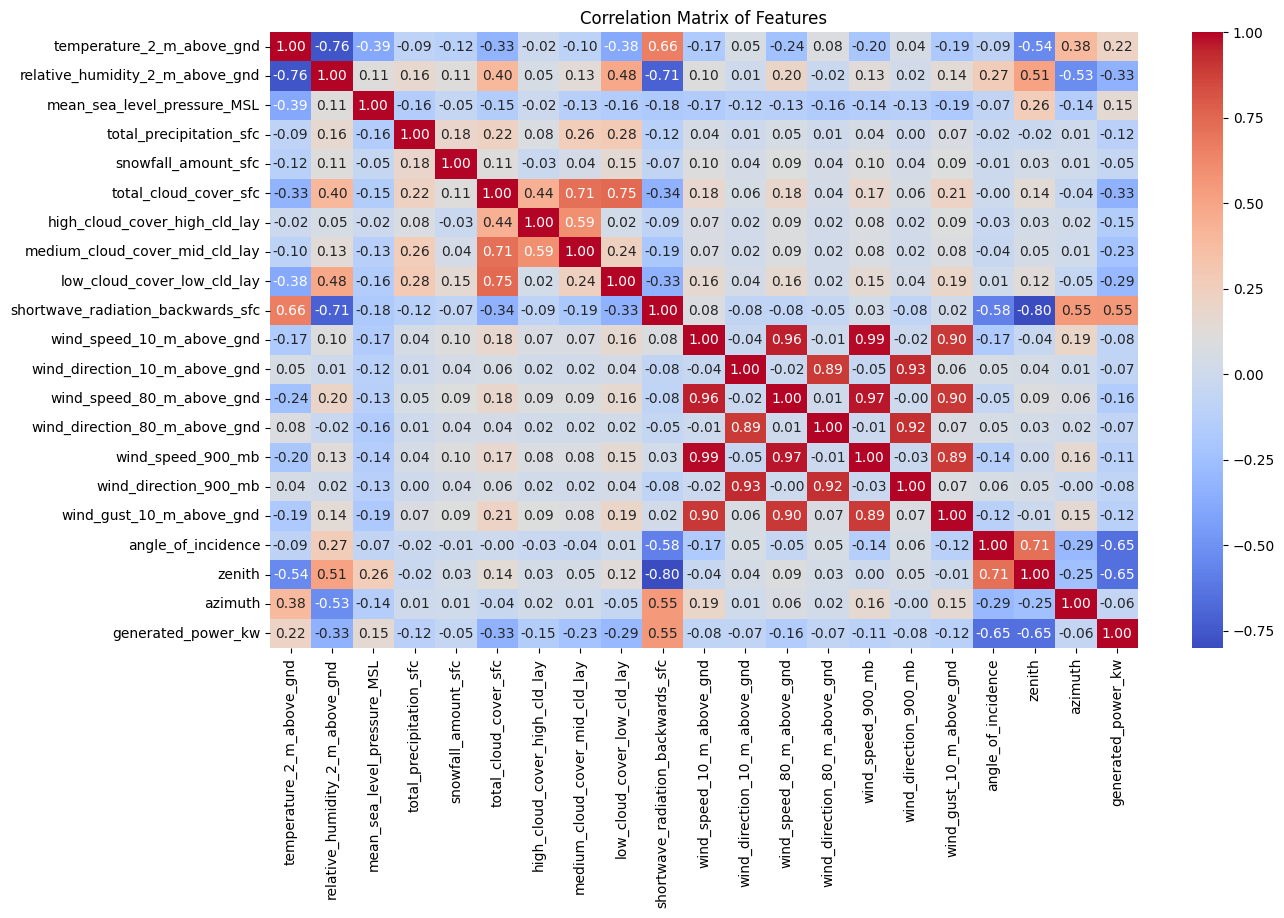

In [ ]:
# Visualize relationships between a few key features and `generated_power_kw`
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
# Select features most correlated with `generated_power_kw`
target = "generated_power_kw"
correlated_features = df.corr()[target].sort_values(ascending=False).index[:5]

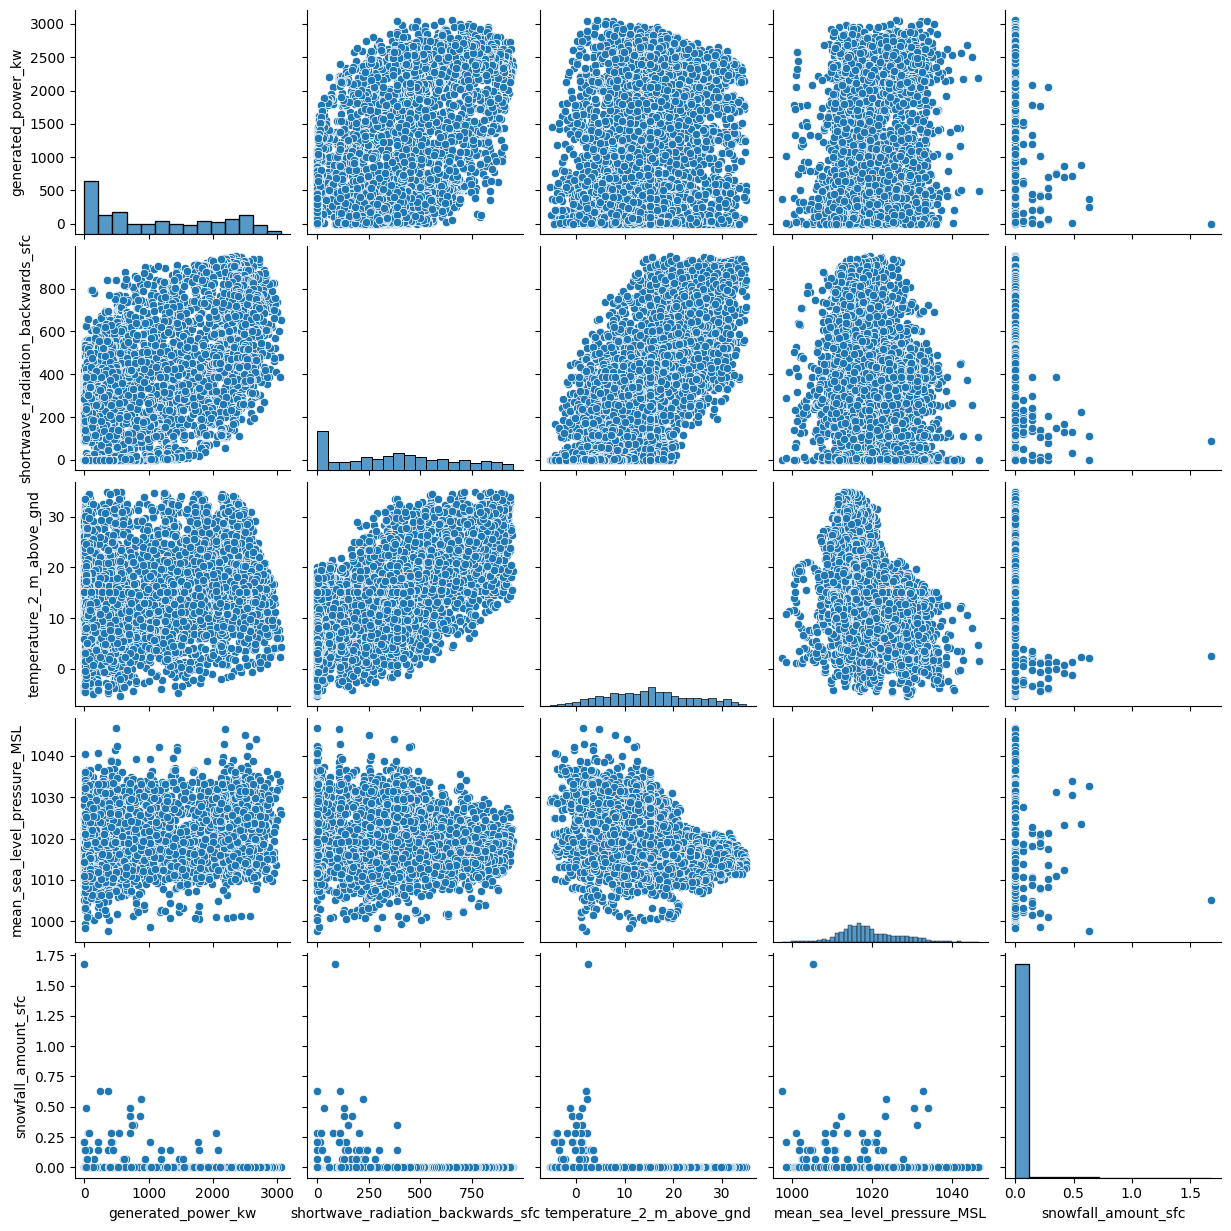

In [ ]:
sns.pairplot(df[correlated_features])
plt.show()

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=[target]).values
y = df[target].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Train Neural Network Model**

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output for regression
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2224999.5000 - mae: 1164.3015 - val_loss: 1989022.2500 - val_mae: 1049.5269
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2127765.7500 - mae: 1134.2717 - val_loss: 1765340.2500 - val_mae: 982.4399
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1774855.8750 - mae: 1021.6953 - val_loss: 1213297.6250 - val_mae: 819.2836
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1116222.2500 - mae: 801.4936 - val_loss: 686260.8125 - val_mae: 621.6517
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 602305.2500 - mae: 586.7940 - val_loss: 490729.1562 - val_mae: 524.8942
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 470433.1250 - mae: 518.8226 - val_loss: 405243.4062 - val_mae: 487.0489
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 347447.1250 - mae: 448.7336 - val_loss: 352525.1562 - val_mae: 458.6614
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 329012.9375 -

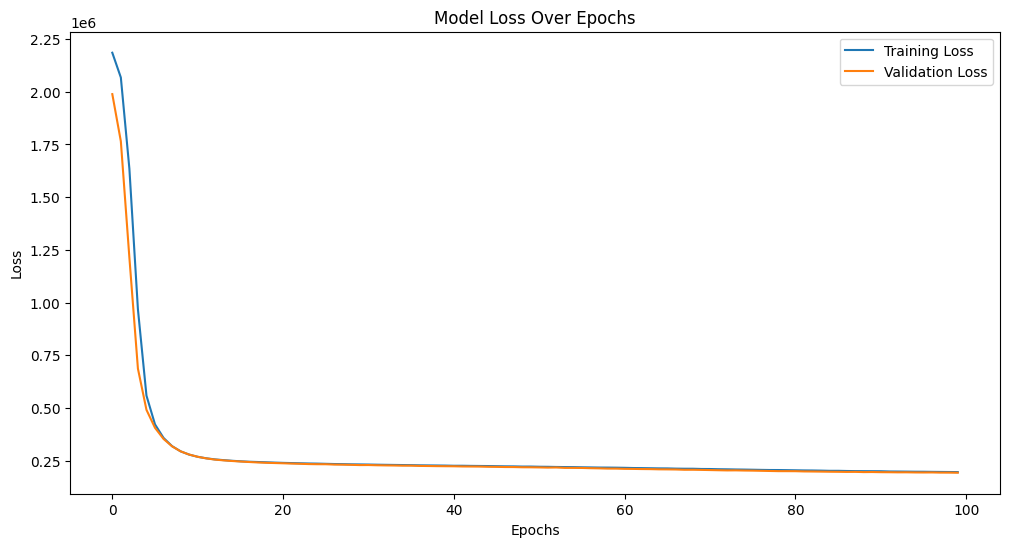

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

##**Evaluate on Test Data before Modifications**

In [ ]:
# Evaluate the Modified Model
test_loss_model, test_mae_model = model.evaluate(X_test, y_test, verbose=0)
print(f"\nModified Model - Test Loss: {test_loss_model}, Test MAE: {test_mae_model}")


Modified Model - Test Loss: 218299.75, Test MAE: 321.662353515625


##**Apply Model Modifications**

In [ ]:
# Modified Model
modified_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output for regression
])

In [ ]:
# Compile the Modified Model
modified_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Extended Early Stopping
extended_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Increased patience
    restore_best_weights=True
)

In [ ]:
# Train Modified Model
history_modified = modified_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[extended_early_stopping],
    verbose=1
)

Epoch 1/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2202312.2500 - mae: 1156.2202 - val_loss: 2001046.7500 - val_mae: 1053.4442
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2150662.5000 - mae: 1146.0271 - val_loss: 1825366.3750 - val_mae: 999.0092
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1926880.8750 - mae: 1072.3541 - val_loss: 1322691.8750 - val_mae: 851.4134
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1238726.5000 - mae: 849.8194 - val_loss: 751591.8750 - val_mae: 649.0068
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 679618.5625 - mae: 623.2972 - val_loss: 499011.8438 - val_mae: 523.6295
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 488229.8750 - mae: 527.3460 - val_loss: 408822.3750 - val_mae: 479.5250
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 416670.9375 - mae: 488.1158 - val_loss: 355234.5938 - val_mae: 452.4797
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 396915.9062 -

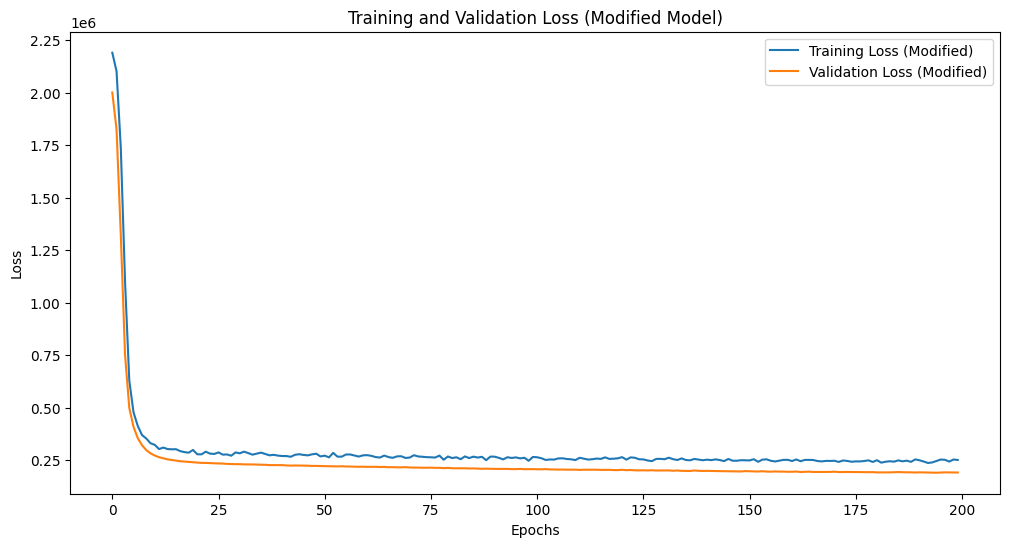

In [ ]:
# Plot Loss History for Modified Model
plt.figure(figsize=(12, 6))
plt.plot(history_modified.history['loss'], label='Training Loss (Modified)')
plt.plot(history_modified.history['val_loss'], label='Validation Loss (Modified)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Modified Model)')
plt.legend()
plt.show()

##**Evaluate on Testing Data After Modifications**

In [ ]:
# Evaluate the Modified Model
test_loss, test_mae = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"\nModified Model - Test Loss: {test_loss}, Test MAE: {test_mae}")


Modified Model - Test Loss: 211735.171875, Test MAE: 318.2574462890625


##**Predictions on Unseen Data**

In [ ]:
# Example Input for Prediction
unseen_example = np.array([X_test[0]])  # Replace with real unseen data

# Make Prediction
prediction = modified_model.predict(unseen_example)
print(f"Predicted Energy Output: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted Energy Output: 2103.560302734375


##**Feature Importance (Using Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
feature_importance = permutation_importance(
    modified_model, X_test, y_test, scoring='neg_mean_squared_error'
)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━

In [ ]:
# Display Feature Importance
importance_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Importance': feature_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                              Feature     Importance
17                 angle_of_incidence  446039.894114
19                            azimuth  333387.198608
9   shortwave_radiation_backwards_sfc  219881.505648
18                             zenith   75200.866324
2         mean_sea_level_pressure_MSL   50675.431531
8         low_cloud_cover_low_cld_lay   36899.760939
1     relative_humidity_2_m_above_gnd   18210.797950
16           wind_gust_10_m_above_gnd   15707.949556
7      medium_cloud_cover_mid_cld_lay   14555.128474
3             total_precipitation_sfc   13522.175853
0           temperature_2_m_above_gnd   10863.927726
5               total_cloud_cover_sfc    9392.790241
4                 snowfall_amount_sfc    9140.299136
6       high_cloud_cover_high_cld_lay    8192.526170
12          wind_speed_80_m_above_gnd    4893.934974
10          wind_speed_10_m_above_gnd    1186.310384
13      wind_direction_80_m_above_gnd    1085.077158
11      wind_direction_10

##**Hyperparameter Tuning**

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [ ]:
# Wrap Model for GridSearchCV
def create_model(neurons=32, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [ ]:
model_grid = KerasRegressor(model=create_model, verbose=0)

In [ ]:
param_grid = {
    'model__neurons': [32, 64],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [50]
}

In [ ]:
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)

# Display Best Parameters
print(f"\nBest Hyperparameters: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo


Best Hyperparameters: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__neurons': 64}


##**Visualize Weights and Biases**

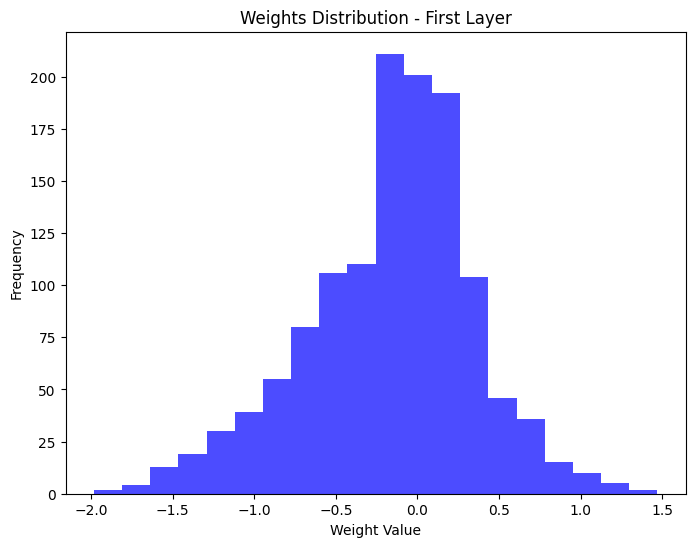

In [ ]:
# Visualize Weights of the First Dense Layer
weights, biases = modified_model.layers[0].get_weights()

plt.figure(figsize=(8, 6))
plt.hist(weights.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Weights Distribution - First Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()